# **Global Cancer Severity Predictor: Leveraging Machine Learning for Early Risk Assessment**
- **Name:** Felix Rafael
- **Email:** felixrafaelkwan@gmail.com


### **Objective:**   
The objective of this project is to develop a robust machine learning regression model to accurately predict the severity score of cancer patients based on lifestyle, genetic, and environmental factors. By utilizing advanced regression techniques, the model aims to assist healthcare professionals and researchers in assessing cancer severity at an early stage, supporting proactive decision-making and tailored treatment strategies.

###**Dataset source:**
https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024

# **1. Import Libraries**

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Regression models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# **2. Data Loading**

In [2]:
# Read CSV files - Cancer Patients
df = pd.read_csv("cancer_patients.csv")

In [3]:
# Show the first 5 rows of Cancer Patients Datasets
df.head()

Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.92  
1            12573.41             4.7                   4.65  
2             6984.33             7.1                   5.84  
3            67446.25             1.6                   3.12  
4            77977.12             2.9                   3.62

# **3. Exploratory Data Analysis (EDA)**

In [4]:
# Review the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 50000
Number of columns: 15


In [5]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
# Show overall descriptive statistics
df.describe(include="all")

Patient_ID           Age Gender Country_Region          Year  \
count       50000  50000.000000  50000          50000  50000.000000   
unique      50000           NaN      3             10           NaN   
top     PT0049983           NaN   Male      Australia           NaN   
freq            1           NaN  16796           5092           NaN   
mean          NaN     54.421540    NaN            NaN   2019.480520   
std           NaN     20.224451    NaN            NaN      2.871485   
min           NaN     20.000000    NaN            NaN   2015.000000   
25%           NaN     37.000000    NaN            NaN   2017.000000   
50%           NaN     54.000000    NaN            NaN   2019.000000   
75%           NaN     72.000000    NaN            NaN   2022.000000   
max           NaN     89.000000    NaN            NaN   2024.000000   

        Genetic_Risk  Air_Pollution   Alcohol_Use       Smoking  \
count   50000.000000   50000.000000  50000.000000  50000.000000   
unique           NaN            NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN   
mean        5.001698       5.010126      5.010880      4.989826   
std         2.885773       2.888399      2.888769      2.881579   
min         0.000000       0.000000      0.000000      0.000000   
25%         2.500000       2.500000      2.500000      2.500000   
50%         5.000000       5.000000      5.000000      5.000000   
75%         7.500000       7.500000      7.500000      7.500000   
max        10.000000      10.000000     10.000000     10.000000   

        Obesity_Level Cancer_Type Cancer_Stage  Treatment_Cost_USD  \
count    50000.000000       50000        50000        50000.000000   
unique            NaN           8            5                 NaN   
top               NaN       Colon     Stage II                 NaN   
freq              NaN        6376        10124                 NaN   
mean         4.991176         NaN          NaN        52467.298239   
std          2.894504         NaN          NaN        27363.229379   
min          0.000000         NaN          NaN         5000.050000   
25%          2.500000         NaN          NaN        28686.225000   
50%          5.000000         NaN          NaN        52474.310000   
75%          7.500000         NaN          NaN        76232.720000   
max         10.000000         NaN          NaN        99999.840000   

        Survival_Years  Target_Severity_Score  
count     50000.000000           50000.000000  
unique             NaN                    NaN  
top                NaN                    NaN  
freq               NaN                    NaN  
mean          5.006462               4.951207  
std           2.883335               1.199677  
min           0.000000               0.900000  
25%           2.500000               4.120000  
50%           5.000000               4.950000  
75%           7.500000               5.780000  
max          10.000000               9.160000

In [7]:
# Check the number of missing values
df.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [8]:
# Check the number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
# Check the number of duplicate columns
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [10]:
# Define column types
categorical_columns = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
numeric_columns = df.select_dtypes(include=['number']).columns

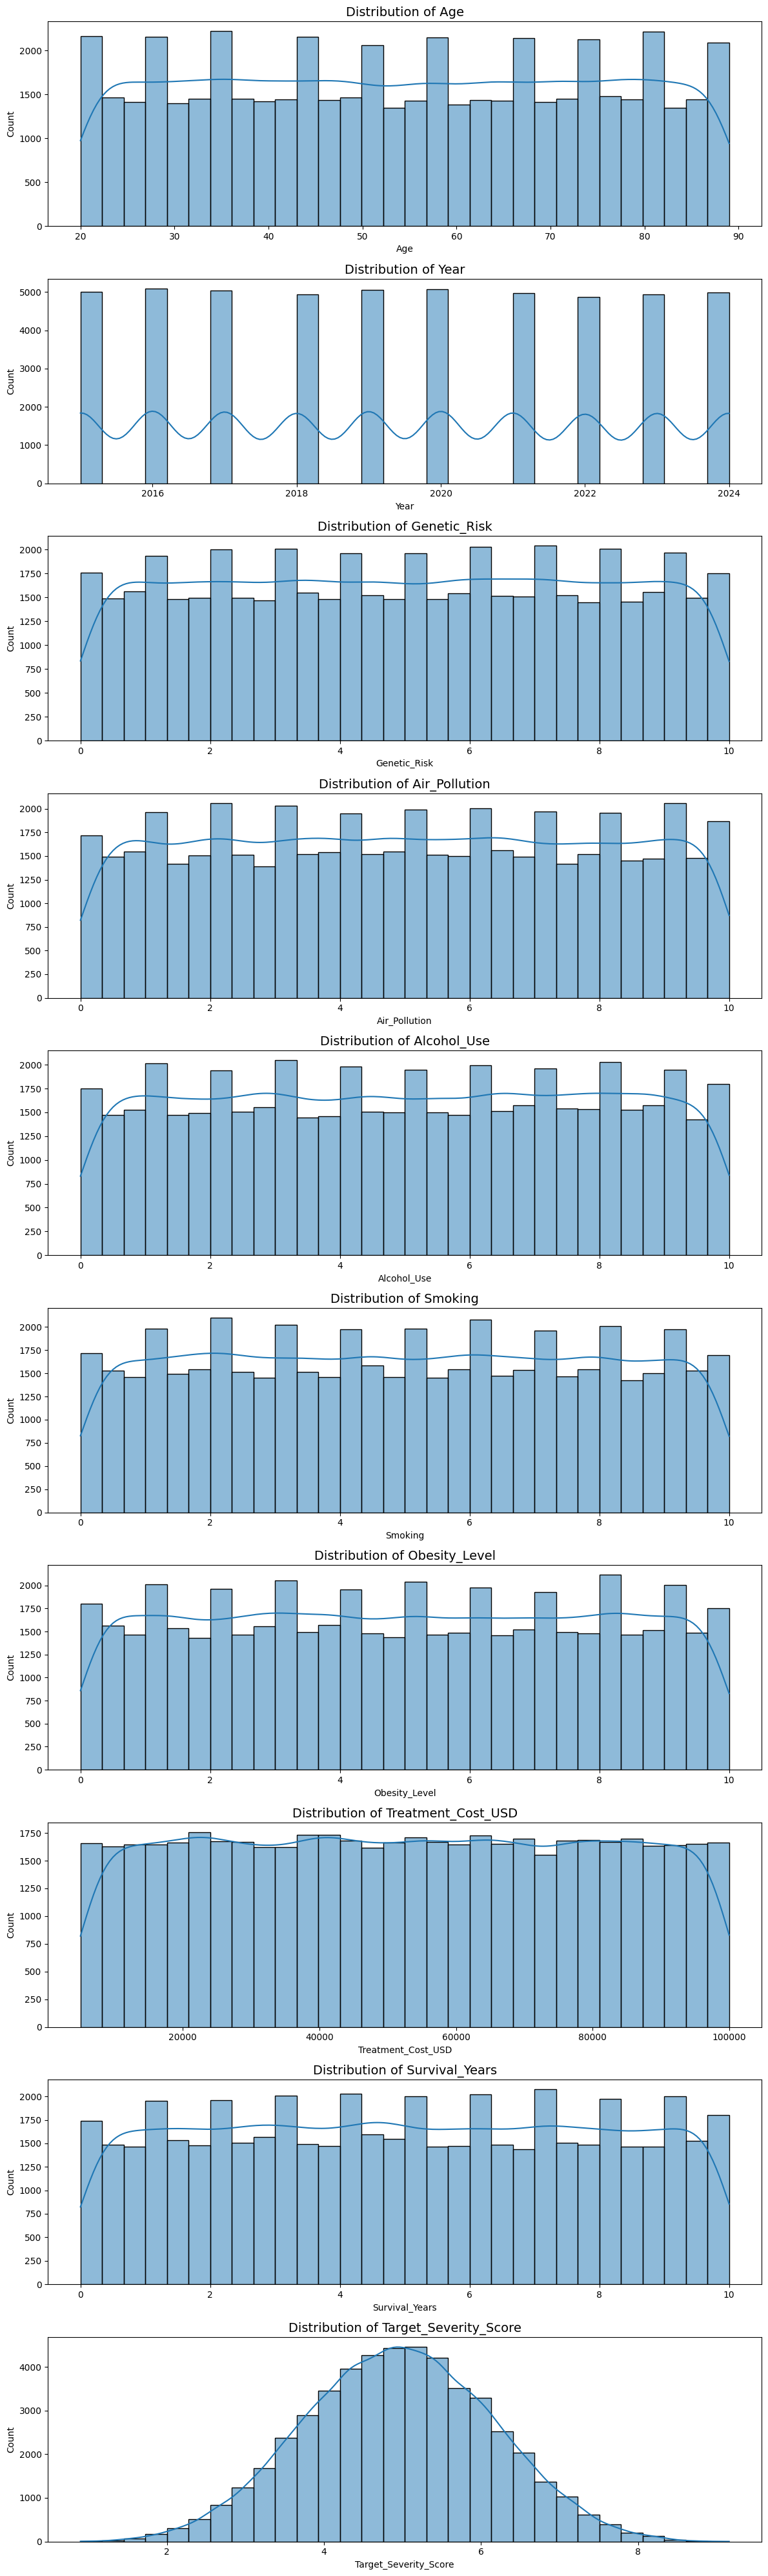

In [11]:
# Shows the distribution for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 4 * len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.show()

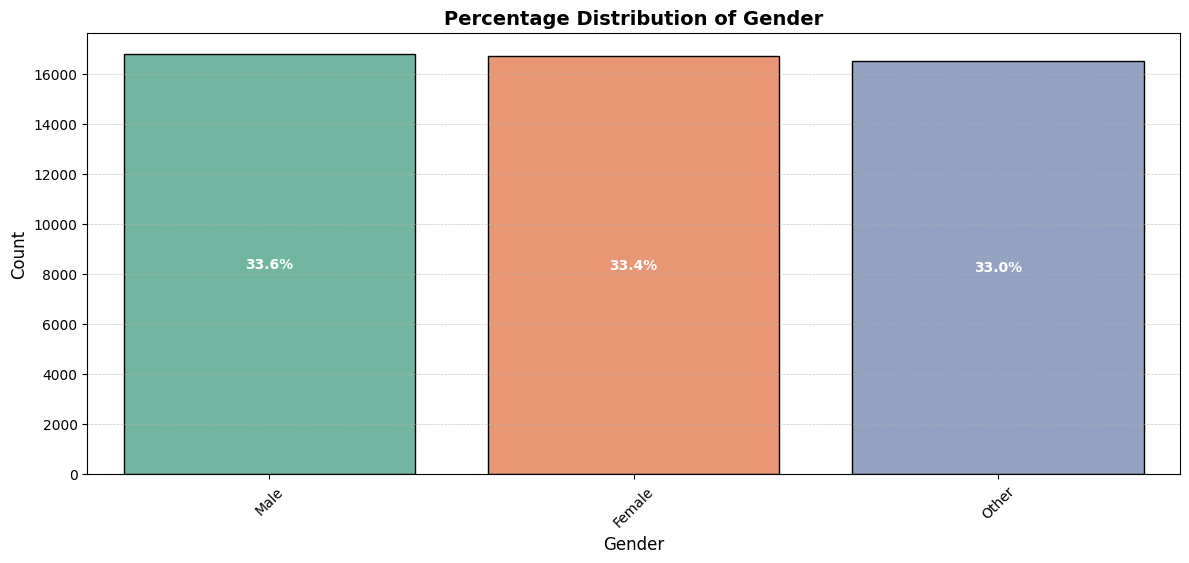

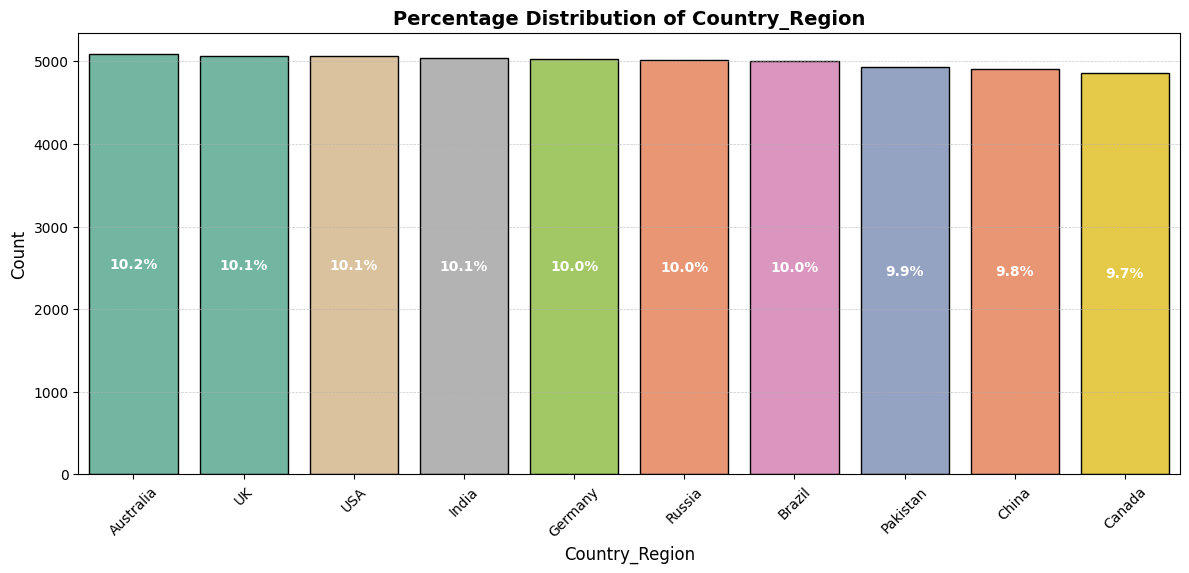

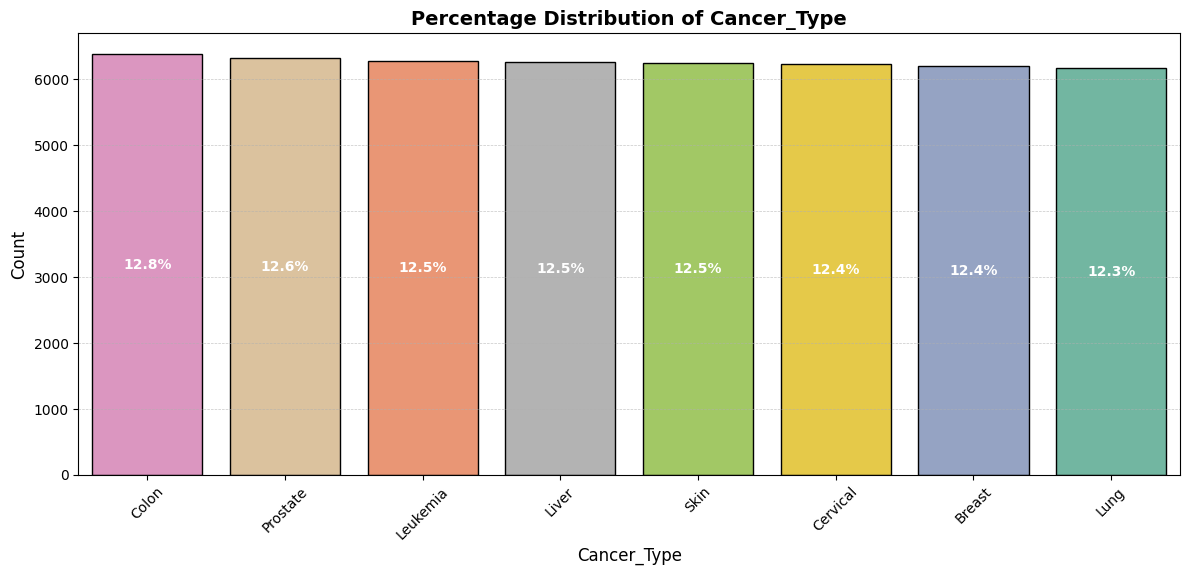

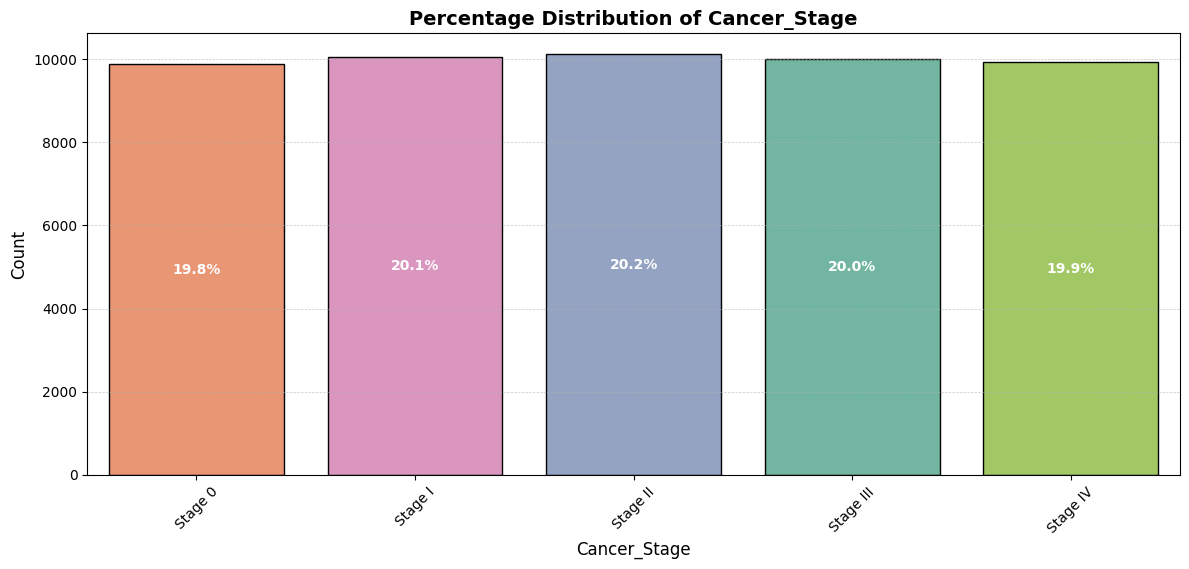

In [12]:
# Custom order for Cancer_Stage
custom_order = {
    'Cancer_Stage': ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']
}

# Plot the percentage distribution of each categorical column
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    order = custom_order.get(col, df[col].value_counts().index)
    total = len(df)

    ax = sns.countplot(
        data=df,
        x=col,
        order=order,
        edgecolor="black",
        hue=df[col],
        palette="Set2",
        legend=False
    )

    for p in ax.patches:
        height = p.get_height()
        percent = f'{100 * height / total:.1f}%'
        ax.annotate(percent,
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='center',
                    fontsize=10, color='white', fontweight='bold')

    plt.title(f'Percentage Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

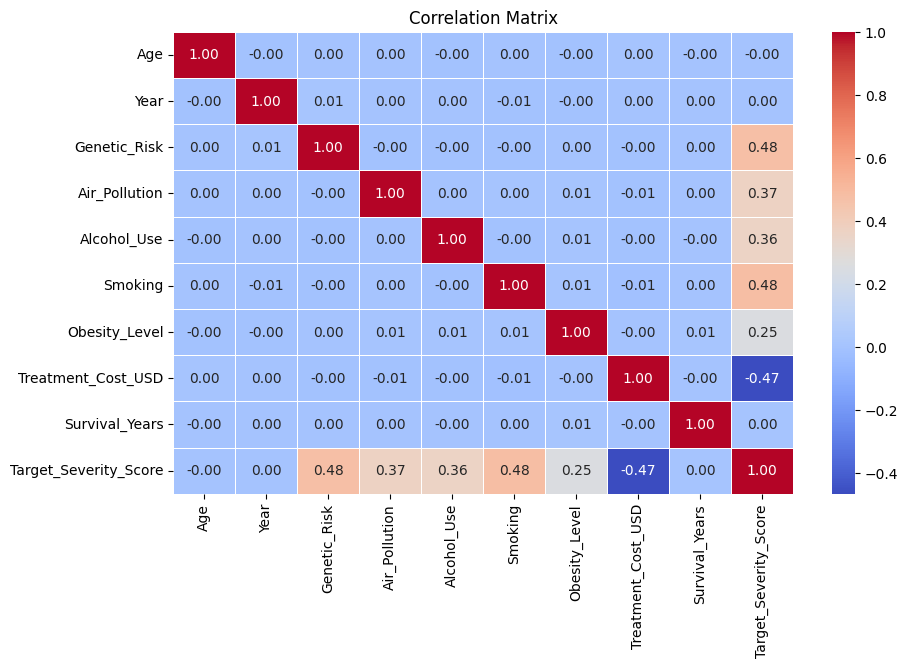

In [13]:
# Calculate correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

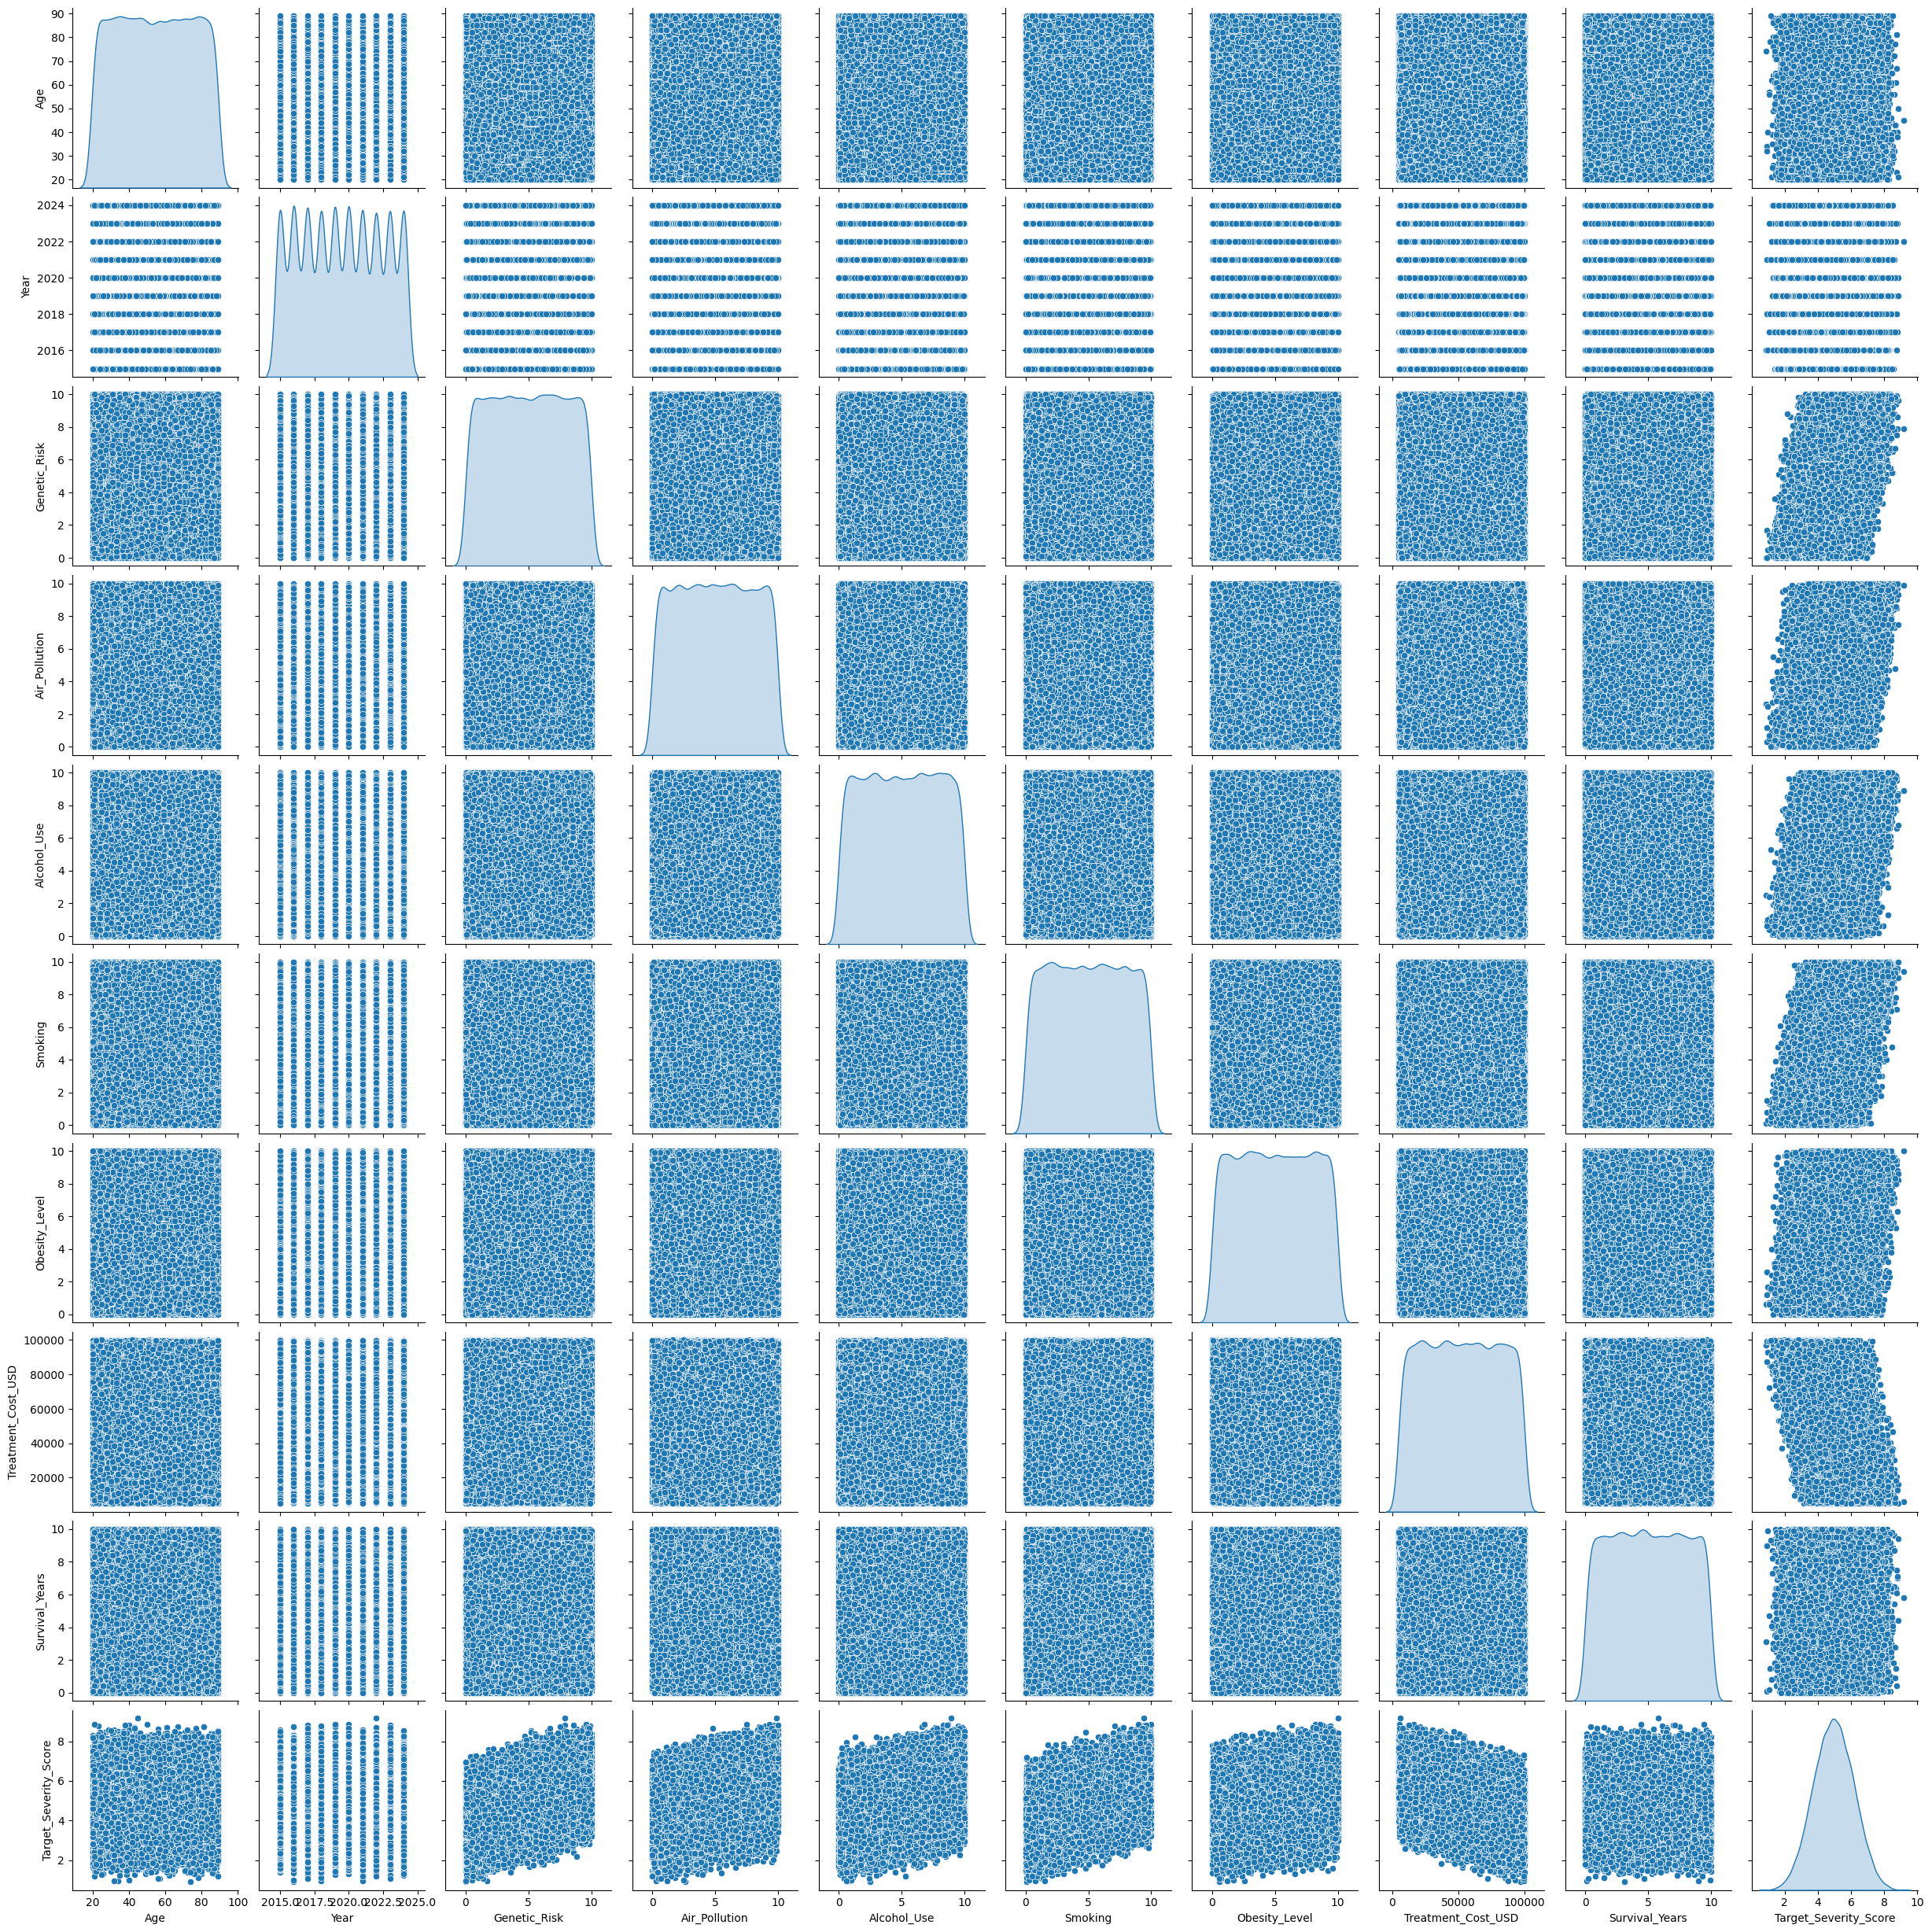

In [14]:
# Shows a visualization of the relationship between numeric features
sns.pairplot(df, diag_kind="kde")
plt.show()

# **4. Data Preprocessing**

In [15]:
# Drop unnecessary columns: Patient_ID, Gender, Country_Region, and Year
df_cleaned = df.drop(columns=['Patient_ID', 'Gender', 'Country_Region', 'Year'])
df_cleaned.head()

Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0   71           6.4            2.8          9.5      0.9            8.7   
1   34           1.3            4.5          3.7      3.9            6.3   
2   80           7.4            7.9          2.4      4.7            0.1   
3   40           1.7            2.9          4.8      3.5            2.7   
4   43           5.1            2.8          2.3      6.7            0.5   

  Cancer_Type Cancer_Stage  Treatment_Cost_USD  Survival_Years  \
0        Lung    Stage III            62913.44             5.9   
1    Leukemia      Stage 0            12573.41             4.7   
2      Breast     Stage II             6984.33             7.1   
3       Colon      Stage I            67446.25             1.6   
4        Skin    Stage III            77977.12             2.9   

   Target_Severity_Score  
0                   4.92  
1                   4.65  
2                   5.84  
3                   3.12  
4                   3.62

In [16]:
# Define list of numeric feature columns for analysis
numeric_cols = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
                'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']

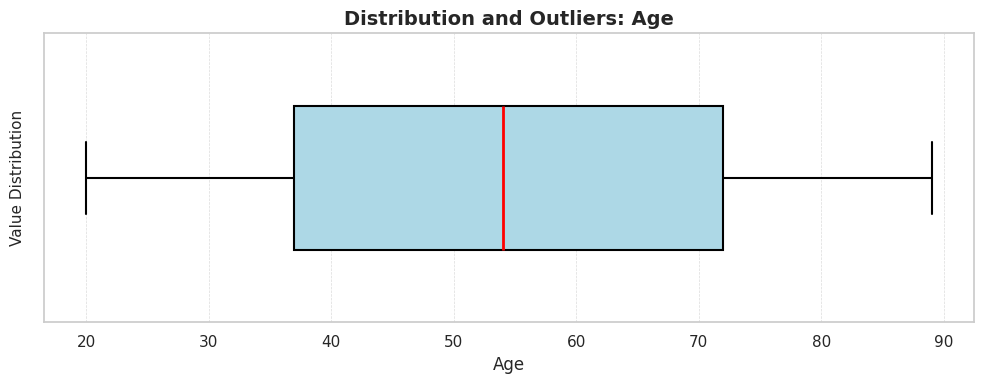

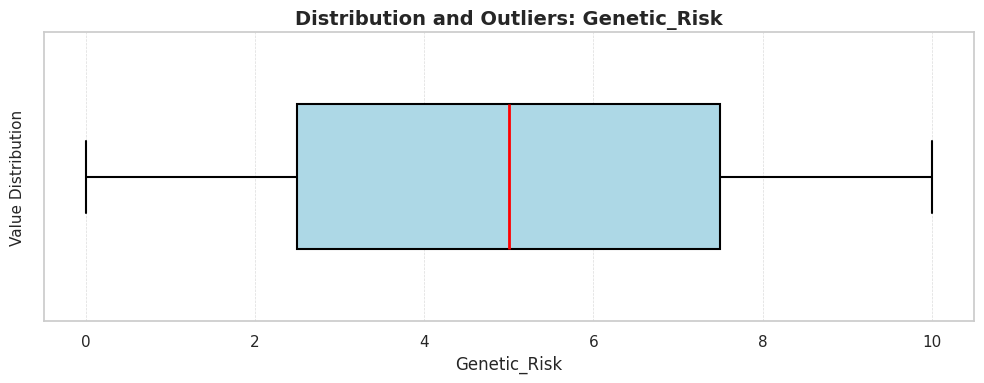

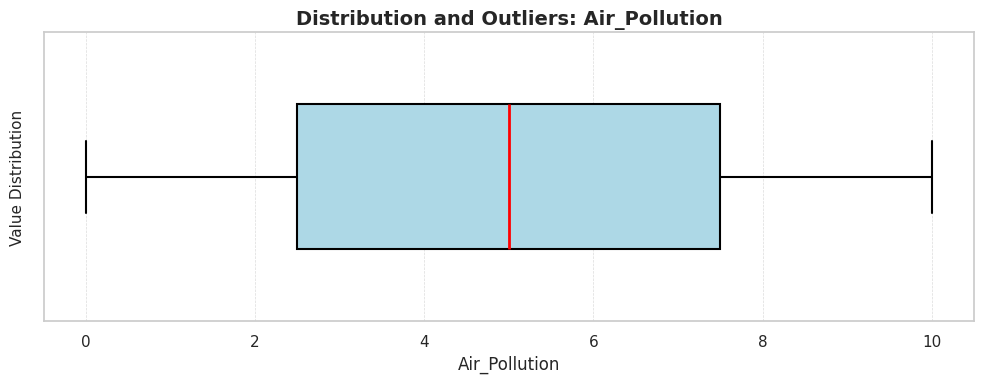

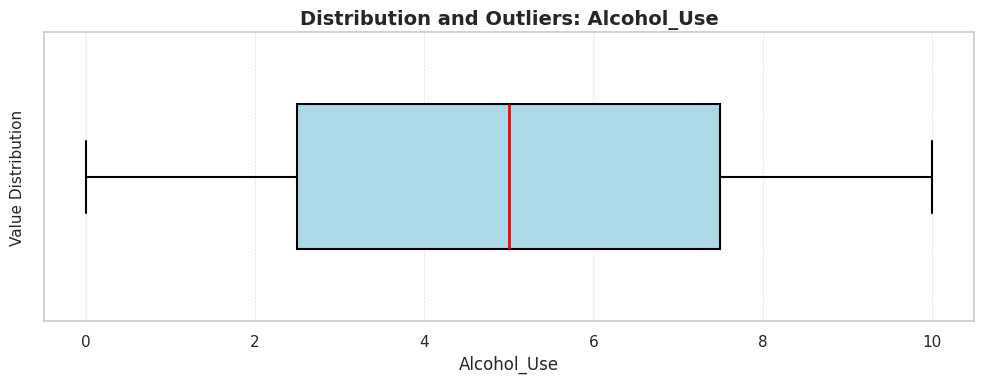

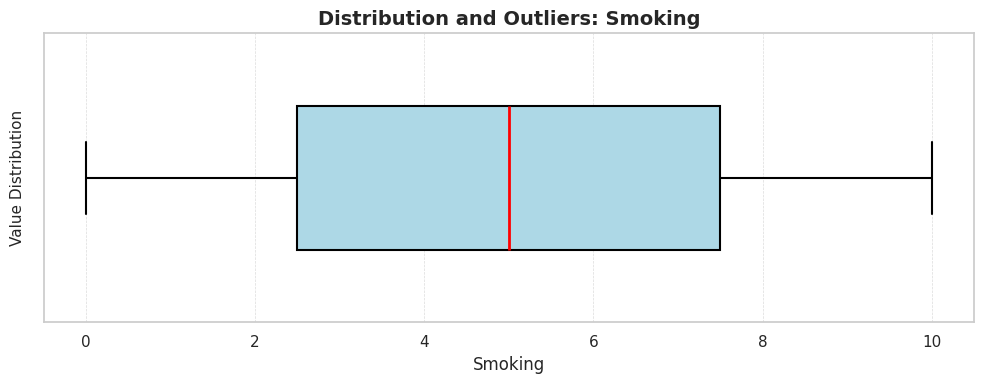

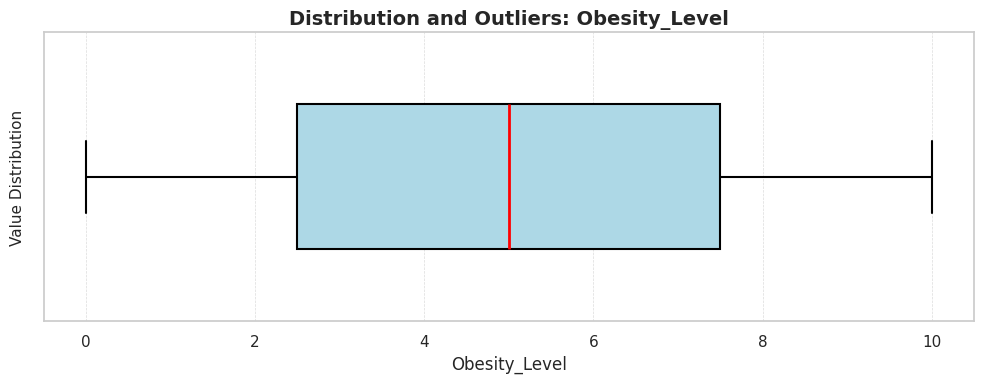

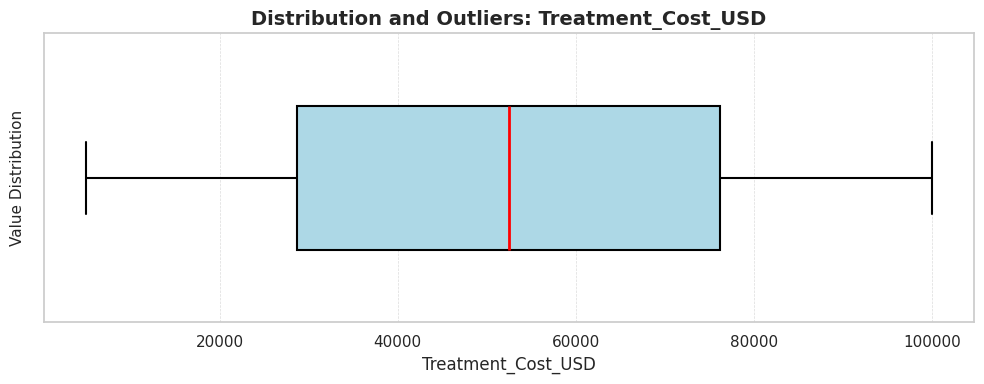

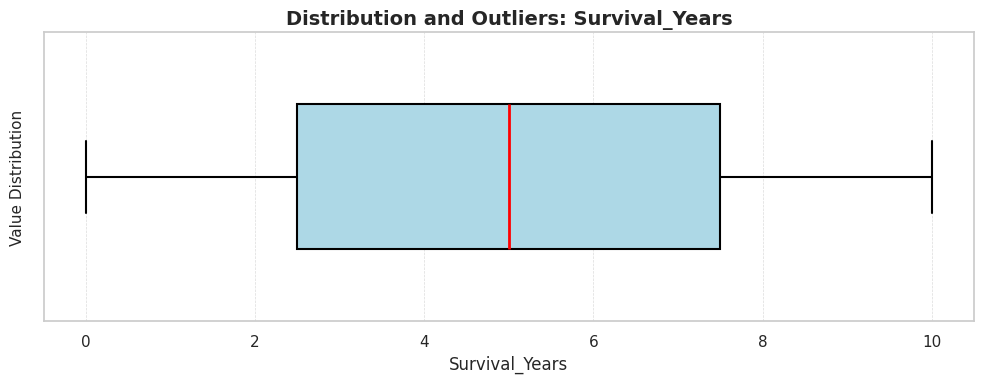

In [17]:
# Create boxplot for each numeric column to visualize distribution and detect outliers
sns.set(style="whitegrid")
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    ax = sns.boxplot(
        x=df[col],
        color="skyblue",
        width=0.5,
        fliersize=5,
        linewidth=1.5,
        boxprops=dict(facecolor='lightblue', edgecolor='black'),
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none')
    )

    plt.title(f'Distribution and Outliers: {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Value Distribution", fontsize=11)
    plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

In [18]:
# Select only the specified numeric columns
df_numeric = df[numeric_cols]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in each numeric column
outlier_counts = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).sum().sort_values(ascending=False)
print("Number of Outliers per Column:\n")
print(outlier_counts)

Number of Outliers per Column:

Age                   0
Genetic_Risk          0
Air_Pollution         0
Alcohol_Use           0
Smoking               0
Obesity_Level         0
Treatment_Cost_USD    0
Survival_Years        0
dtype: int64


In [19]:
# Apply standardization only to numeric features
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])
df_cleaned.head()

Age  Genetic_Risk  Air_Pollution  Alcohol_Use   Smoking  \
0  0.819732      0.484555      -0.765181     1.554006 -1.419315   
1 -1.009755     -1.282754      -0.176614    -0.453790 -0.378208   
2  1.264742      0.831086       1.000521    -0.903813 -0.100580   
3 -0.713082     -1.144141      -0.730559    -0.073001 -0.517022   
4 -0.564745      0.034065      -0.765181    -0.938430  0.593491   

   Obesity_Level Cancer_Type Cancer_Stage  Treatment_Cost_USD  Survival_Years  \
0       1.281346        Lung    Stage III            0.381762        0.309900   
1       0.452180    Leukemia      Stage 0           -1.457952       -0.106288   
2      -1.689832      Breast     Stage II           -1.662210        0.726089   
3      -0.791569       Colon      Stage I            0.547417       -1.181443   
4      -1.551637        Skin    Stage III            0.932276       -0.730572   

   Target_Severity_Score  
0                   4.92  
1                   4.65  
2                   5.84  
3                   3.12  
4                   3.62

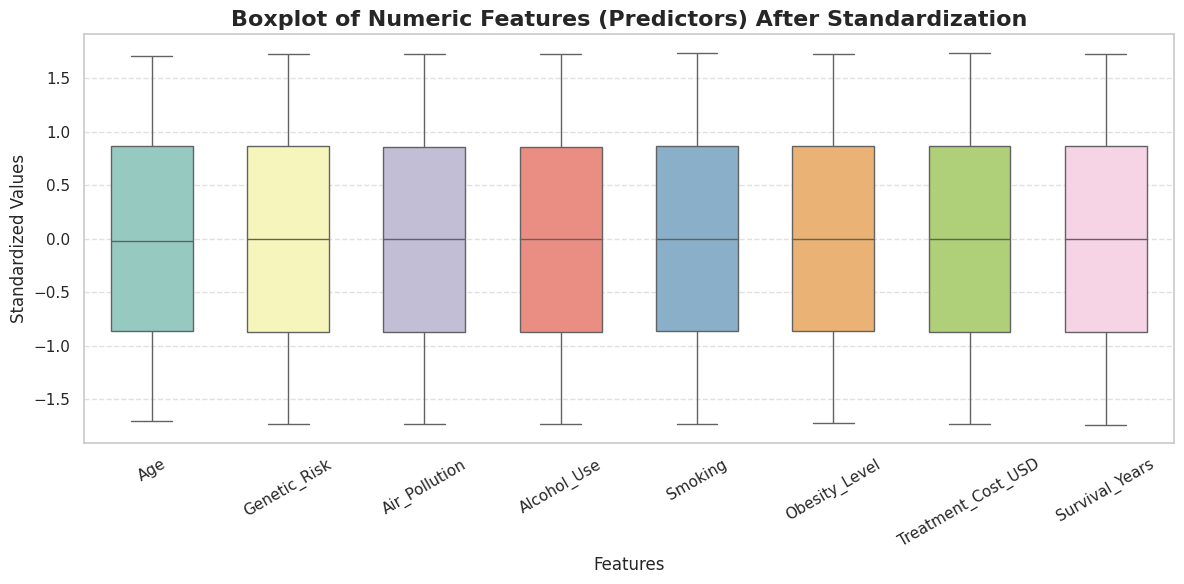

In [20]:
# Select only numeric features as model inputs
df_numeric = df_cleaned[numeric_cols]

# Plot boxplot of numeric features after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, orient="v", palette="Set3", width=0.6, fliersize=4, linewidth=1)
plt.title("Boxplot of Numeric Features (Predictors) After Standardization", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Standardized Values", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
# Encode categorical columns 'Cancer_Type' and 'Cancer_Stage' using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Cancer_Type', 'Cancer_Stage'], dtype=int)
df_encoded.head()

Age  Genetic_Risk  Air_Pollution  Alcohol_Use   Smoking  \
0  0.819732      0.484555      -0.765181     1.554006 -1.419315   
1 -1.009755     -1.282754      -0.176614    -0.453790 -0.378208   
2  1.264742      0.831086       1.000521    -0.903813 -0.100580   
3 -0.713082     -1.144141      -0.730559    -0.073001 -0.517022   
4 -0.564745      0.034065      -0.765181    -0.938430  0.593491   

   Obesity_Level  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  \
0       1.281346            0.381762        0.309900                   4.92   
1       0.452180           -1.457952       -0.106288                   4.65   
2      -1.689832           -1.662210        0.726089                   5.84   
3      -0.791569            0.547417       -1.181443                   3.12   
4      -1.551637            0.932276       -0.730572                   3.62   

   Cancer_Type_Breast  ...  Cancer_Type_Leukemia  Cancer_Type_Liver  \
0                   0  ...                     0                  0   
1                   0  ...                     1                  0   
2                   1  ...                     0                  0   
3                   0  ...                     0                  0   
4                   0  ...                     0                  0   

   Cancer_Type_Lung  Cancer_Type_Prostate  Cancer_Type_Skin  \
0                 1                     0                 0   
1                 0                     0                 0   
2                 0                     0                 0   
3                 0                     0                 0   
4                 0                     0                 1   

   Cancer_Stage_Stage 0  Cancer_Stage_Stage I  Cancer_Stage_Stage II  \
0                     0                     0                      0   
1                     1                     0                      0   
2                     0                     0                      1   
3                     0                     1                      0   
4                     0                     0                      0   

   Cancer_Stage_Stage III  Cancer_Stage_Stage IV  
0                       1                      0  
1                       0                      0  
2                       0                      0  
3                       0                      0  
4                       1                      0  

[5 rows x 22 columns]

In [22]:
# Separate features and target variable
X = df_encoded.drop(columns=['Target_Severity_Score'])
y = df_encoded['Target_Severity_Score']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 21)
X_test shape: (10000, 21)
y_train shape: (40000,)
y_test shape: (10000,)


# **5. Model Development**

## **a. Random Forest**

In [23]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# Training model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## **b. XGBoost**

In [24]:
# Initialize the model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
# Training model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## **c. LightGBM**

In [25]:
# Initialize the model
lgb_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
# Training model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 21
[LightGBM] [Info] Start training from score 4.953744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(max_depth=6, n_estimators=200, random_state=42)

# **6. Model Evaluation**

## **a. Random Forest**

In [26]:
# Predict on training data using the trained Random Forest model
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate performance on training data
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Random Forest Evaluation on Training Set:")
print(f"MAE: {mae_train_rf:.4f}")
print(f"RMSE: {rmse_train_rf:.4f}")
print(f"R2 Score: {r2_train_rf:.4f}")

Random Forest Evaluation on Training Set:
MAE: 0.1653
RMSE: 0.2074
R2 Score: 0.9702


In [27]:
# Predict on test data using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance on test data
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")

Random Forest Regressor:
MAE: 0.2024
RMSE: 0.2532
R2 Score: 0.9549


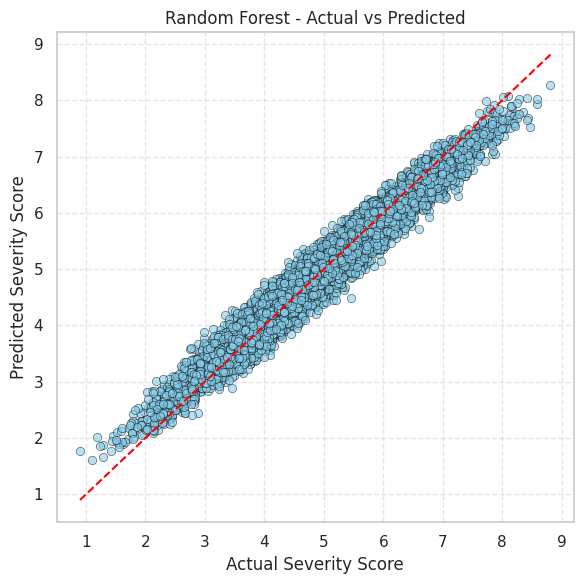

In [28]:
# Plot scatterplot of actual vs predicted values for Random Forest model
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='skyblue', edgecolor='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('Random Forest - Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

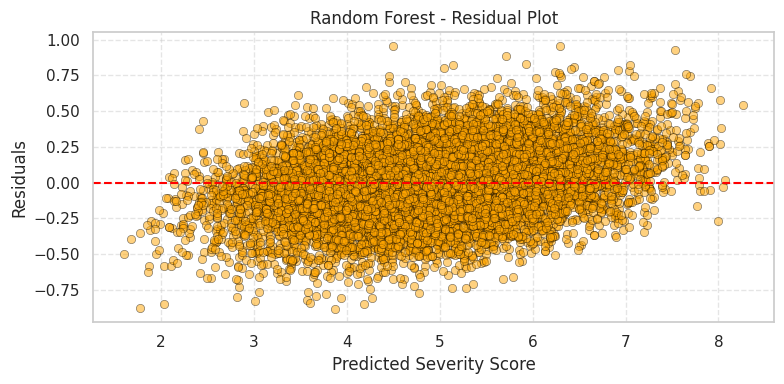

In [29]:
# Calculate residuals for Random Forest predictions
residuals_rf = y_test - y_pred_rf

# Plot residuals versus predicted values to assess model errors
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='orange', edgecolor='black', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Severity Score')
plt.ylabel('Residuals')
plt.title('Random Forest - Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

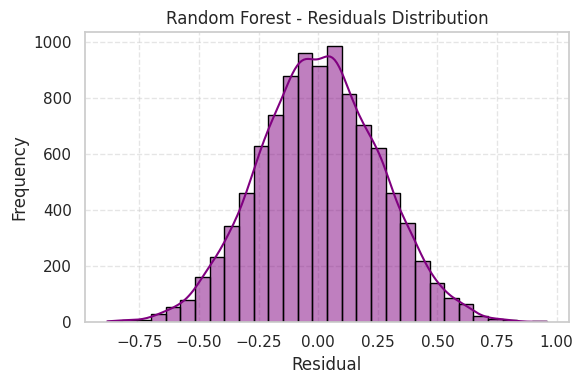

In [30]:
# Plot distribution of residuals for Random Forest predictions with KDE curve
plt.figure(figsize=(6, 4))
sns.histplot(residuals_rf, kde=True, color='purple', edgecolor='black', bins=30)
plt.title('Random Forest - Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **b. XGBoost**

In [31]:
# Predict on training data using the trained XGBoost model
y_train_pred_xgb = xgb_model.predict(X_train)

# Evaluate performance on training data
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

print("XGBoost Regressor Evaluation on Training Set:")
print(f"MAE: {mae_train_xgb:.4f}")
print(f"RMSE: {rmse_train_xgb:.4f}")
print(f"R2 Score: {r2_train_xgb:.4f}")

XGBoost Regressor Evaluation on Training Set:
MAE: 0.0496
RMSE: 0.0627
R2 Score: 0.9973


In [32]:
# Predict on test data using the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance on test data
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

XGBoost Regressor:
MAE: 0.0628
RMSE: 0.0788
R2 Score: 0.9956


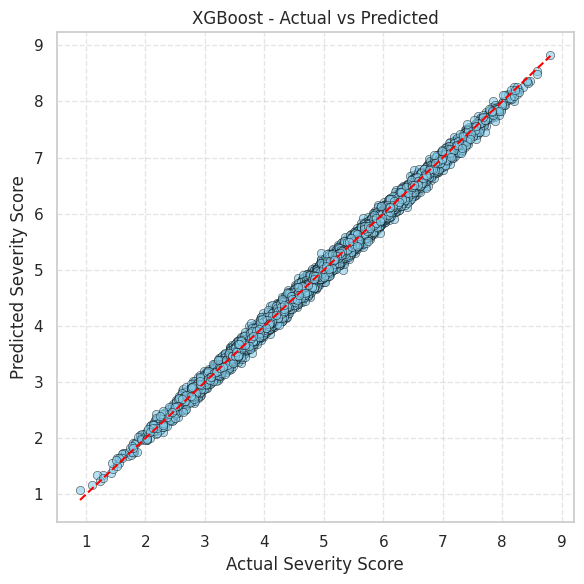

In [33]:
# Plot scatterplot of actual vs predicted values for XGBoost model
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='skyblue', edgecolor='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('XGBoost - Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

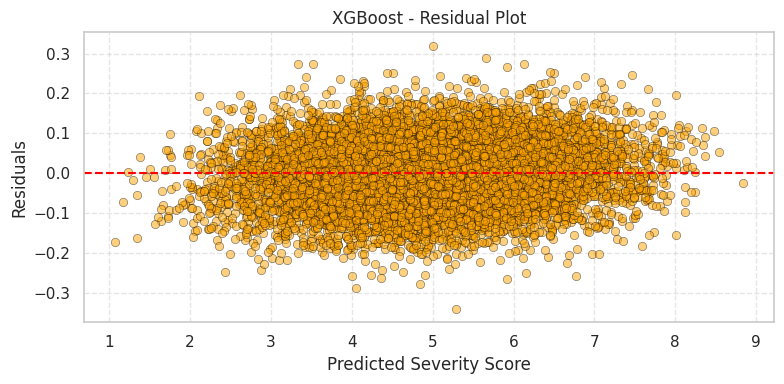

In [34]:
# Calculate residuals for XGBoost predictions
residuals_xgb = y_test - y_pred_xgb

# Plot residuals versus predicted values to assess model errors
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, color='orange', edgecolor='black', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Severity Score')
plt.ylabel('Residuals')
plt.title('XGBoost - Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

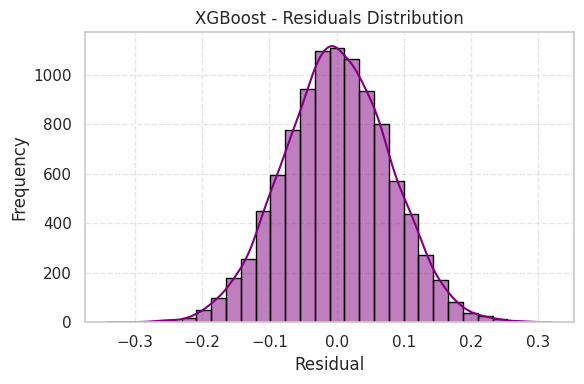

In [35]:
# Plot distribution of residuals for XGBoost predictions with KDE curve
plt.figure(figsize=(6, 4))
sns.histplot(residuals_xgb, kde=True, color='purple', edgecolor='black', bins=30)
plt.title('XGBoost - Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **c. LightGBM**

In [36]:
# Predict on training data using the trained LightGBM model
y_train_pred_lgb = lgb_model.predict(X_train)

# Evaluate model performance on training data
mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

print("LightGBM Regressor Evaluation on Training Set:")
print(f"MAE: {mae_train_lgb:.4f}")
print(f"RMSE: {rmse_train_lgb:.4f}")
print(f"R2 Score: {r2_train_lgb:.4f}")

LightGBM Regressor Evaluation on Training Set:
MAE: 0.0516
RMSE: 0.0649
R2 Score: 0.9971


In [37]:
# Predict on test data using the trained LightGBM model
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance on test data
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regressor:")
print(f"MAE: {mae_lgb:.4f}")
print(f"RMSE: {rmse_lgb:.4f}")
print(f"R2 Score: {r2_lgb:.4f}")

LightGBM Regressor:
MAE: 0.0582
RMSE: 0.0732
R2 Score: 0.9962


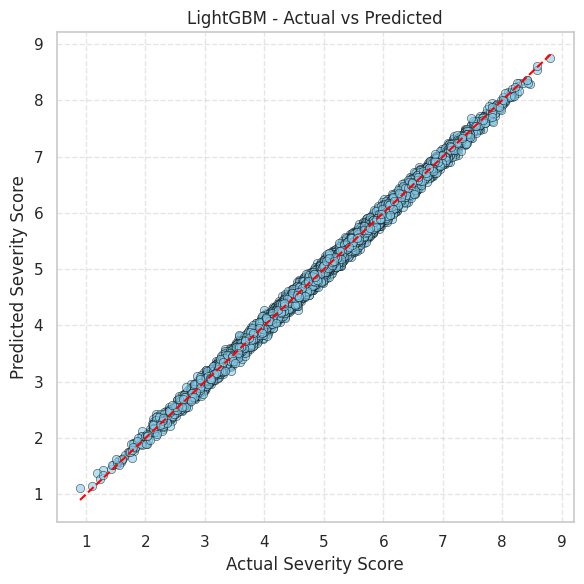

In [38]:
# Plot Actual vs Predicted values for LightGBM model
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, color='skyblue', edgecolor='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('LightGBM - Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

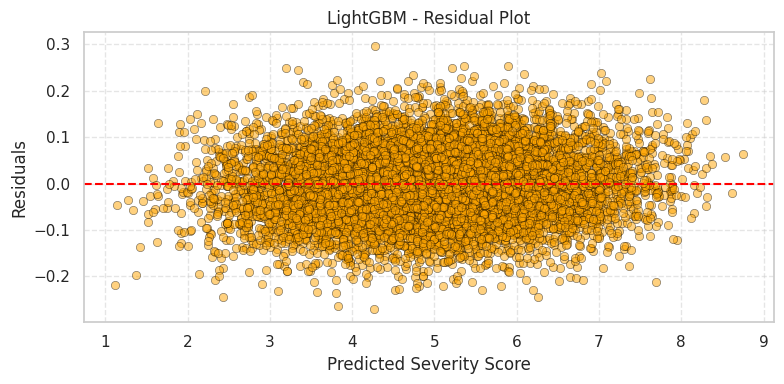

In [39]:
# Calculate residuals for LightGBM predictions
residuals_lgb = y_test - y_pred_lgb

# Plot residuals versus predicted values to assess model errors
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred_lgb, y=residuals_lgb, color='orange', edgecolor='black', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Severity Score')
plt.ylabel('Residuals')
plt.title('LightGBM - Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

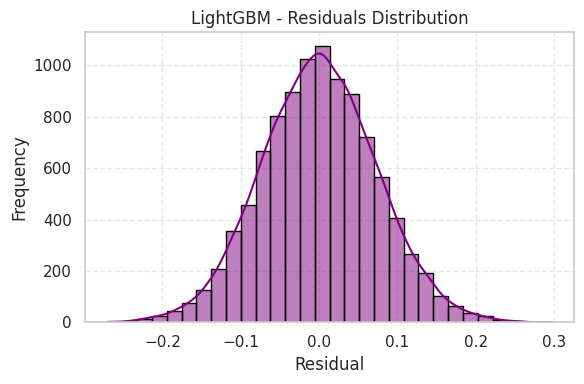

In [40]:
# Plot distribution of residuals for LightGBM predictions with KDE curve
plt.figure(figsize=(6, 4))
sns.histplot(residuals_lgb, kde=True, color='purple', edgecolor='black', bins=30)
plt.title('LightGBM - Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **7. Hyperparameter Tunning**

## **a. XGBoost**

In [41]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization term
    'reg_lambda': [1, 1.5, 2.0]   # L2 regularization term
}

# Initialize the XGBoost regressor with a fixed random state for reproducibility
xgb = XGBRegressor(random_state=42)

# Setup RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=50,            # Number of parameter settings sampled
    cv=3,                 # 3-fold cross-validation
    verbose=1,            # Show progress messages
    random_state=42,      # For reproducibility
    scoring='neg_mean_squared_error',  # Evaluation metric to minimize
    n_jobs=-1             # Use all available CPU cores
)

# Fit the randomized search model on training data
xgb_random.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Parameters for XGBoost:")
print(xgb_random.best_params_)

# Predict on test data using the best model
y_pred_xgb_tuned = xgb_random.predict(X_test)

# Evaluate the tuned model's performance
print("Evaluation After Tuning:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)):.4f}")
print(f"R2: {r2_score(y_test, y_pred_xgb_tuned):.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for XGBoost:
{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Evaluation After Tuning:
MAE: 0.0442
RMSE: 0.0556
R2: 0.9978


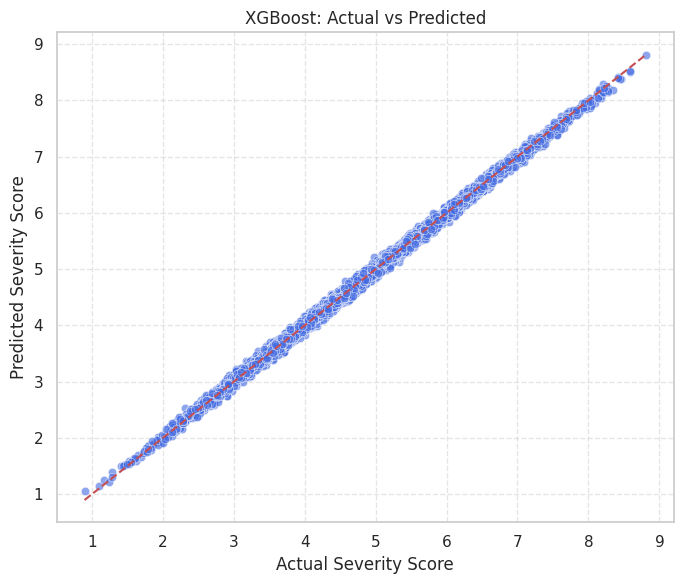

In [42]:
# Plot Actual vs Predicted values for XGBoost model after Hyperparameter Tunning
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', edgecolor='white')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Actual Severity Score')
    plt.ylabel('Predicted Severity Score')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_actual_vs_predicted(y_test, y_pred_xgb_tuned , title='XGBoost: Actual vs Predicted')

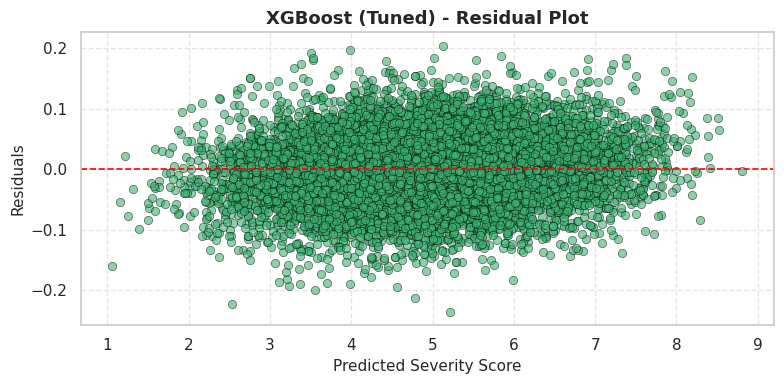

In [43]:
# Calculate residuals from the tuned XGBoost model after Hyperparameter Tunning
residuals_lgb_tuned = y_test - y_pred_xgb_tuned
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_pred_xgb_tuned,
    y=residuals_lgb_tuned,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.6
)
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel('Predicted Severity Score', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('XGBoost (Tuned) - Residual Plot', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

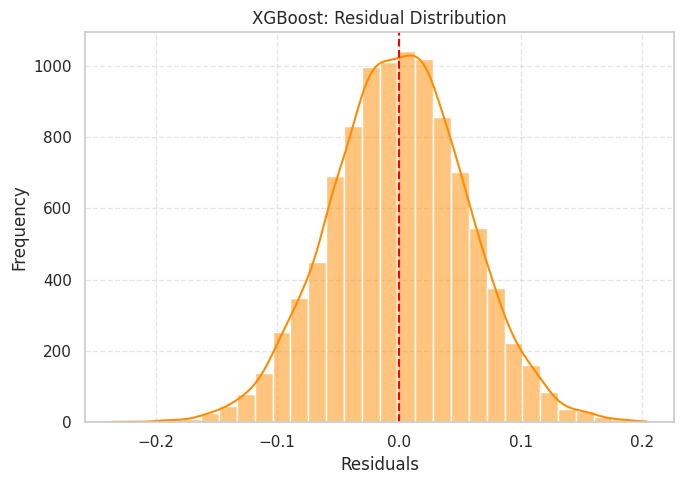

In [44]:
# Plot residual distribution for tuned XGBoost model
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, bins=30, kde=True, color='darkorange')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_residuals(y_test, y_pred_xgb_tuned, title='XGBoost: Residual Distribution')

## **b. LightGBM**

In [45]:
# Define the hyperparameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200, 300],            # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage used in update to prevent overfitting
    'num_leaves': [31, 50, 100],                # Maximum number of leaves in one tree
    'max_depth': [-1, 5, 10],                   # Maximum tree depth (-1 means no limit)
    'min_child_samples': [10, 20, 30],          # Minimum number of data needed in a child (leaf)
    'subsample': [0.6, 0.8, 1.0],               # Fraction of data to be used for each tree (row sampling)
    'colsample_bytree': [0.6, 0.8, 1.0]         # Fraction of features used for each tree (feature sampling)
}

# Initialize the LightGBM Regressor model
lgb = LGBMRegressor(random_state=42)

# Set up randomized search with cross-validation for hyperparameter tuning
lgb_random = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=lgb_param_grid,
    n_iter=50,                             # Number of parameter settings sampled
    cv=3,                                 # 3-fold cross-validation
    verbose=1,                            # Show progress messages
    random_state=42,                      # For reproducibility
    scoring='neg_mean_squared_error',    # Evaluation metric to minimize
    n_jobs=-1                            # Use all available CPU cores
)

# Fit the randomized search model on training data
lgb_random.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Parameters for LightGBM:")
print(lgb_random.best_params_)

# Predict on test data using the best model
y_pred_lgb_tuned = lgb_random.predict(X_test)

# Evaluate the tuned model's performance
print("Evaluation After Tuning:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lgb_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb_tuned)):.4f}")
print(f"R2: {r2_score(y_test, y_pred_lgb_tuned):.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 21
[LightGBM] [Info] Start training from score 4.953744
Best Parameters for LightGBM:
{'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Evaluation After Tuning:
MAE: 0.0415
RMSE: 0.0522
R2: 0.9981


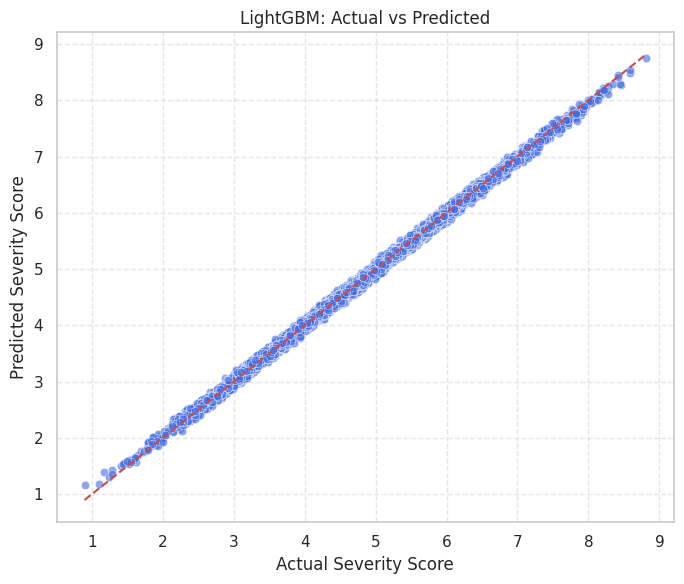

In [46]:
# Plot Actual vs Predicted values for LightGBM model after Hyperparameter Tunning
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', edgecolor='white')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Actual Severity Score')
    plt.ylabel('Predicted Severity Score')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_actual_vs_predicted(y_test, y_pred_lgb_tuned, title='LightGBM: Actual vs Predicted')

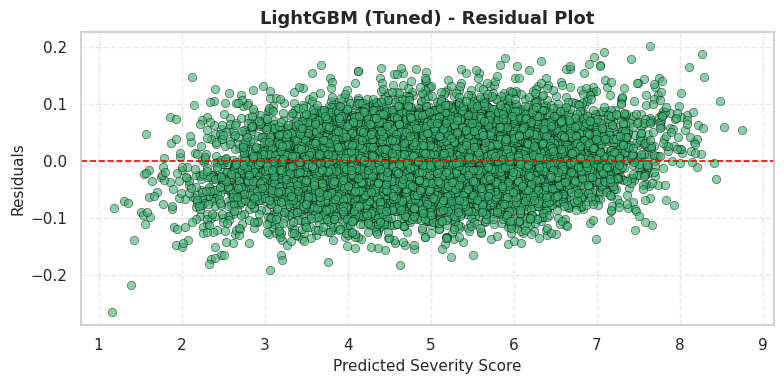

In [47]:
# Calculate residuals from the tuned LightGBM model after Hyperparameter Tunning
residuals_lgb_tuned = y_test - y_pred_lgb_tuned
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_pred_lgb_tuned,
    y=residuals_lgb_tuned,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.6
)
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel('Predicted Severity Score', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('LightGBM (Tuned) - Residual Plot', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

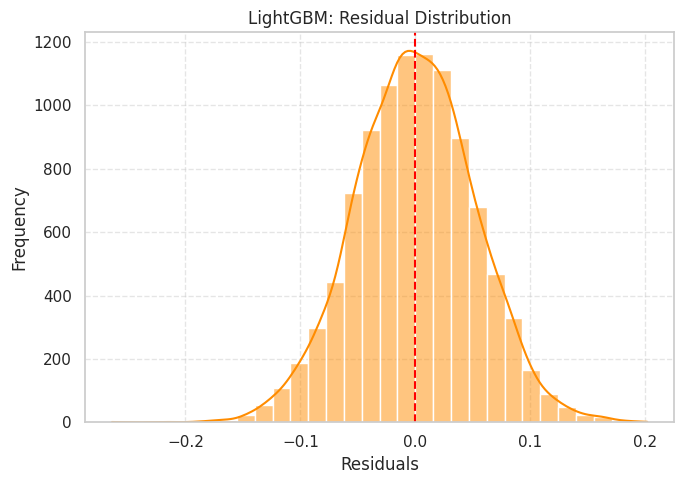

In [48]:
# Plot residual distribution for tuned LightGBM model
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, bins=30, kde=True, color='darkorange')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_residuals(y_test, y_pred_lgb_tuned, title='LightGBM: Residual Distribution')